In [1]:
from glob import glob
import numpy as np
from scipy.io import loadmat
import rasterio as rio
import earthpy.plot as ep
import matplotlib.pyplot as plt

In [2]:
path="/Users/amograo/Internship_Projects/IISc-2024/lulc-hope/EO_Browser_Images-4"
S_sentinel_bands = glob(f"{path}/*B?*.tiff")
S_sentinel_bands.sort()


l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

# Data
arr_st = np.stack(l)

# Ground Truth
# y_data = loadmat('Sundarbands_gt.mat')['gt']

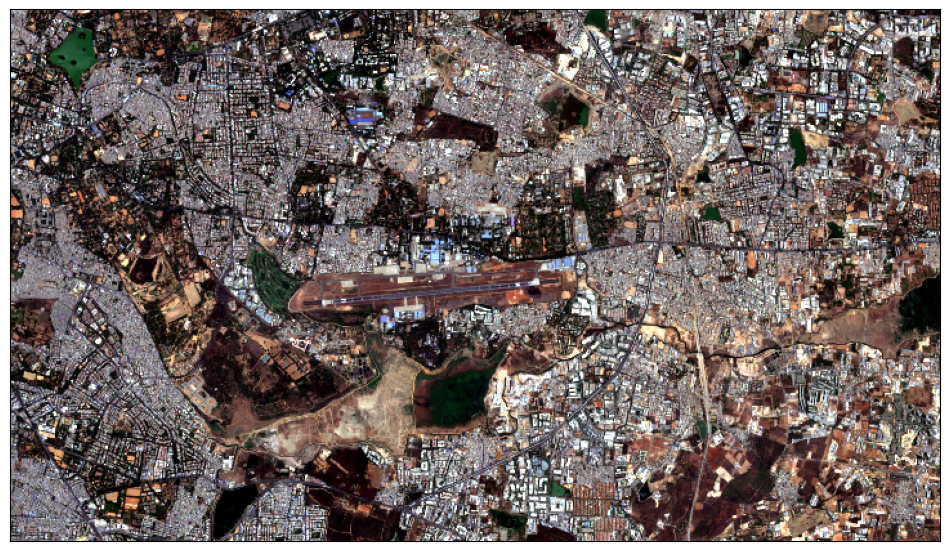

In [3]:
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=2,
    figsize=(12, 16),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

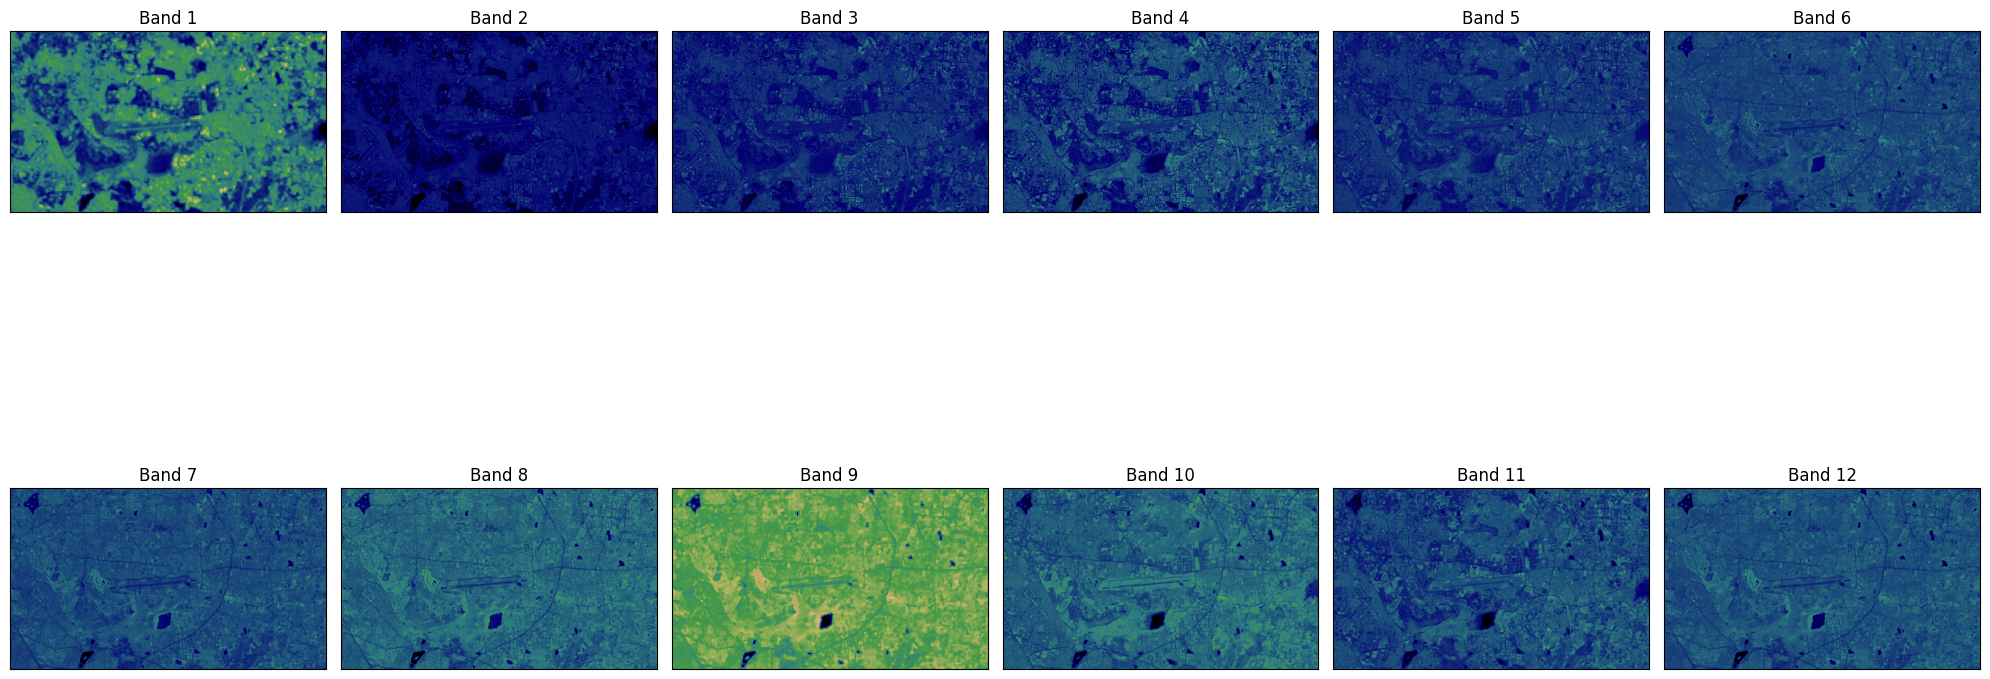

In [4]:
ep.plot_bands(arr_st, 
              cmap = 'gist_earth', 
              figsize = (20, 12), 
              cols = 6, 
              cbar = False)
plt.show()

In [5]:
x = np.moveaxis(arr_st, 0, -1)
org_shape = x.shape
x.shape

(413, 722, 12)

In [6]:
x.reshape(-1, 12).shape, 954*298

((298186, 12), 284292)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_data = x.reshape(-1, 12)

scaler = StandardScaler().fit(X_data)

X_scaled = scaler.transform(X_data)

X_scaled.shape

(298186, 12)

In [8]:
pca = PCA(n_components = 4)

pca.fit(X_scaled)

data = pca.transform(X_scaled)

In [9]:
data.shape

(298186, 4)

In [10]:
np.sum(pca.explained_variance_ratio_)

np.float32(0.9492605)

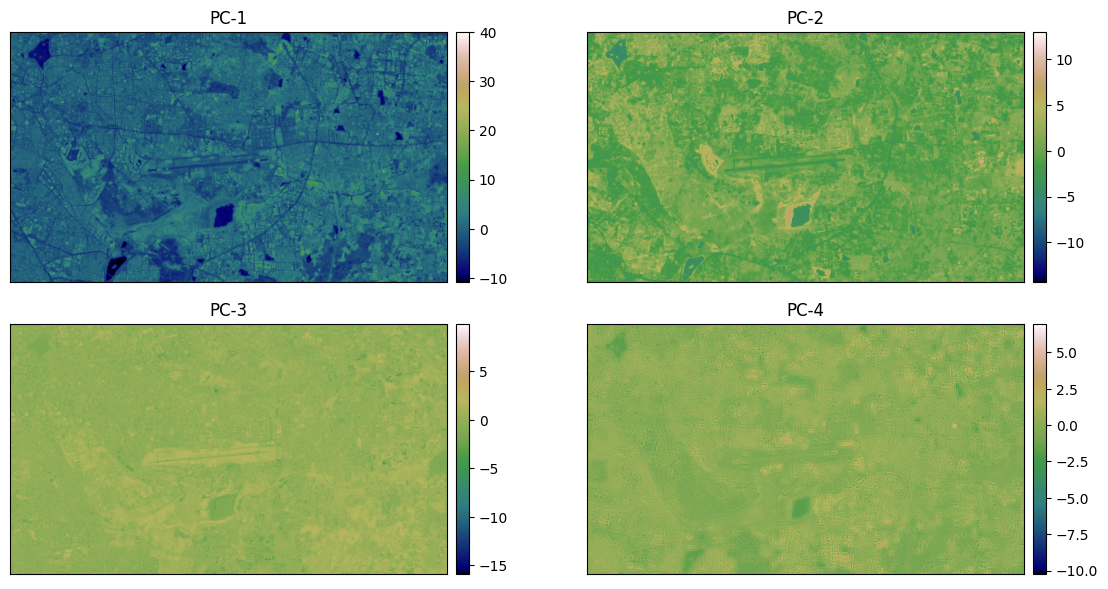

In [11]:
ep.plot_bands(np.moveaxis(data.reshape((org_shape[0], org_shape[1], data.shape[1])), -1, 0),
              cmap = 'gist_earth',
              cols = 2,
              figsize = (12, 6),
              title = [f'PC-{i}' for i in range(1,5)])

plt.show()

In [15]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, random_state = 11)
kmeans.fit(data)



KMeans(n_clusters=6, random_state=11)

In [16]:
labels = kmeans.predict(data)
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=int32)

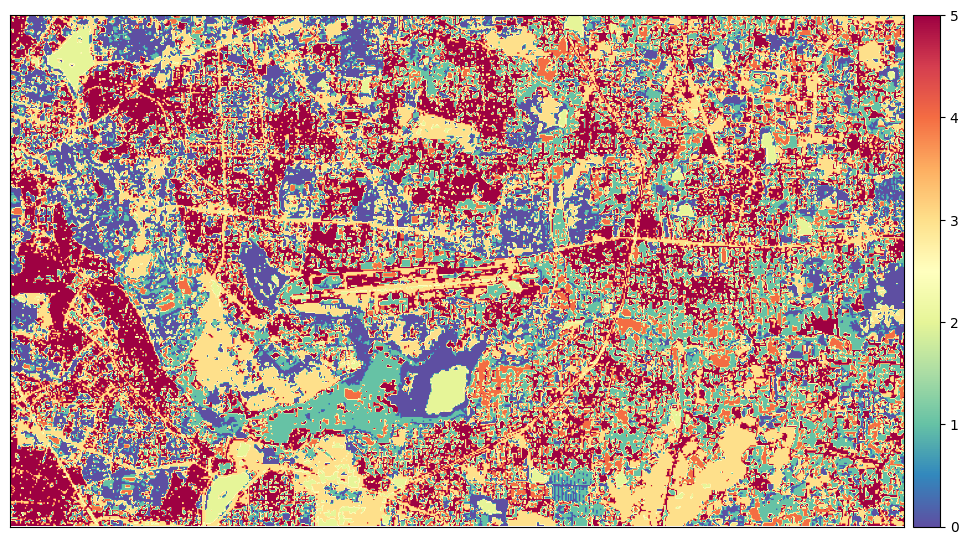

In [17]:
ep.plot_bands(labels.reshape(org_shape[0], org_shape[1]), 
              figsize = (12, 16),
              cmap='Spectral_r')
plt.show()